# Power Supply

With the PSLab's power supply, we can control programmable voltage and current sources to power many different kinds of experiments.

## Requirements

- Jumper wire x 3
- Smallish resistor (~100R)
- LED x 2

As usual, start by importing the library and connecting to the device:

In [1]:
import pslab
psl = pslab.ScienceLab()

## Voltage sources

The power supply is used by assigning the desired output value to the appropriate pin. We can read back the actual output value by connecting the voltage source pins (PV1-3) to the multimeter:

In [2]:
psl.power_supply.pv1 = 1.7
psl.multimeter.measure_voltage()

0.3271794871794872

### Blinking an LED

Now that we've introducted the PSLab's programmable voltage source, we can do the "Hello world!" of hardware: Blinking an LED. Connect the positive leg of the LED to PV1, in series with a resistor, per this diagram: 

<img src="images/blink_led.svg" width="500" height="340">

**Do not connect the LED directly to the PV1 pin without a resistor in series!** If you connect the LED directly to the PV1 pin you may burn out the LED.

In [3]:
import time
for i in range(20):
    psl.power_supply.pv1 = (5, 0)[i % 2]
    time.sleep(0.5)

### Changing the current direction

The PV1 and PV2 pins can output negative voltages, i.e. they can drive the current in both directions. In order to measure negative voltages we must use one of CH1-3 as input to the multimeter:

In [4]:
psl.power_supply.pv1 = -1.7
psl.multimeter.measure_voltage(channel="CH1")

-0.09808836996337

We can visualize this using a second LED connected in parallel with the first, but with reversed polarity:

<img src="images/blink_led_reverse.svg" width="500" height="340">

In [6]:
for i in range(20):
    psl.power_supply.pv1 = (5, -5)[i % 2]
    time.sleep(0.5)
psl.power_supply.pv1 = 0

## Current source

The PCS pin is a programmable current source. It can output a current up to 3.3 mA. In order to measure the generated current, we can connect a resistor between PCS and GND, and also connect the PCS pin to the multimeter.

Before we turn on the current, the multimeter will read 0 V, since it's connected to ground via the resistor:

In [8]:
psl.multimeter.measure_voltage()

0.0

Once we turn on the current, we can use the multimeter to read the voltage drop across the resistor. In this case we use a 330 Ω resistor.

In [23]:
psl.power_supply.pcs = 2e-3
v_drop = psl.multimeter.measure_voltage()
v_drop / 330  # Ohm's law, I = U / R

0.0021611721611721614

Be aware that the full current range up to 3.3 mA is not always available; the actual maximum current depends on the load resistance:

I_max = 3.3 V / (1 kΩ + R_load)

In the case of the 330 Ω resistor we used here, the highest current we can get from the PCS pin is:

3.3 V / 1330 Ω = 2.5 mA

Let's take a look at what happens when we try to set a higher current than the source is able to provide:

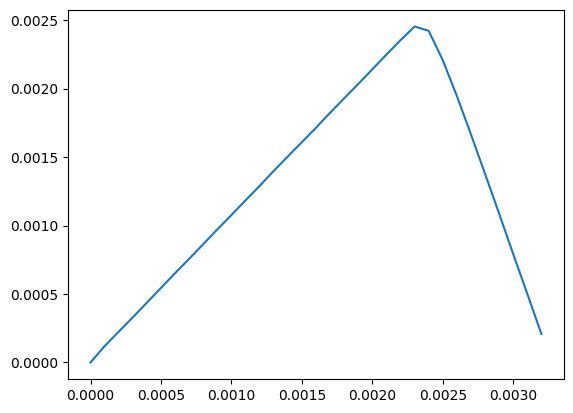

In [25]:
import matplotlib.pyplot as plt
import numpy as np
currents = np.arange(0, 3.3e-3, 1e-4)
actual = []
for i in currents:
    psl.power_supply.pcs = i
    v_drop = psl.multimeter.measure_voltage()
    actual.append(v_drop / 330)
plt.plot(currents, actual)

We see that the actual current starts to drop sharply if a higher current than is available is requested. This highlights the importance of accounting for the load resistance when doing experiments with the current source.

That's it for the power source! Next, we will see how we can use the PSLab's oscilloscope to capture large amounts of analog data very quickly.